## Hands-on - Probability Distributions and Variability

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr, kendalltau
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_1samp

# Load dataset from GitHub URL
file_path = "https://raw.githubusercontent.com/Hamed-Ahmadinia/DASP-2025/refs/heads/main/fcc-forum-pageviews.csv"
df = pd.read_csv(file_path)

# Read the dataset into a pandas dataframe
#df = pd.read_csv(file_path)  # Load the dataset as a pandas DataFrame

# Display the first few rows of the dataframe to confirm the data has been loaded correctly
print("Dataset Preview:")  # Print a label for context
print(df)  # Display the first 5 rows of the dataset

Dataset Preview:
            date   value
0     2016-05-09    1201
1     2016-05-10    2329
2     2016-05-11    1716
3     2016-05-12   10539
4     2016-05-13    6933
...          ...     ...
1299  2019-11-29  171584
1300  2019-11-30  141161
1301  2019-12-01  142918
1302  2019-12-02  220144
1303  2019-12-03  158549

[1304 rows x 2 columns]


### **Question 1: Check for missing values**
- Check for any **missing values** in each colum.

In [2]:
# Your code here:

missing_counts = df.isnull().sum()
print("Missing Data Count:\n", missing_counts)

Missing Data Count:
 date     0
value    0
dtype: int64


### **Question 2: Compute the Covariance Between Consecutive Days**
- Create a new column: **Previous Day Views"**, which contains the previous day's pageviews.
- Compute the covariance between **"value"** (current day's views) and **"Previous Day Views"**.



Covariance Matrix:
                           value  Previous Day Views
value               3.520547e+09        2.417820e+09
Previous Day Views  2.417820e+09        3.517486e+09


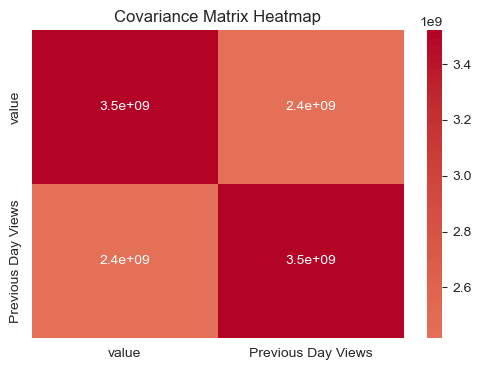

In [3]:


# Your code here:
# Create a new column: Previous Day Views
df['Previous Day Views'] = df['value'].shift(1)

# Remove rows with NaN values introduced by the rolling window
df_clean = df.dropna()

# Calculate the covariance matrix between the original values and their rolling mean
cov_matrix = df_clean[['value', 'Previous Day Views']].cov()

# Display the covariance matrix
print("\nCovariance Matrix:")
print(cov_matrix)

# Visualize the covariance matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cov_matrix, annot=True, cmap="coolwarm", center=0)

# Add plot title
plt.title("Covariance Matrix Heatmap")

# Show the plot
plt.show()

### **Question 3: Compute Pearson, Spearman, and Kendall Correlation Between Pageviews and Previous Day Views**
- Compute and compare three different correlation measures.?


Pearson Correlation:
                    value  Previous Day Views
value                 1.0                -1.0
Previous Day Views   -1.0                 1.0

Spearman Correlation:
                    value  Previous Day Views
value                 1.0                -1.0
Previous Day Views   -1.0                 1.0

Kendall Correlation:
                    value  Previous Day Views
value                 1.0                -1.0
Previous Day Views   -1.0                 1.0


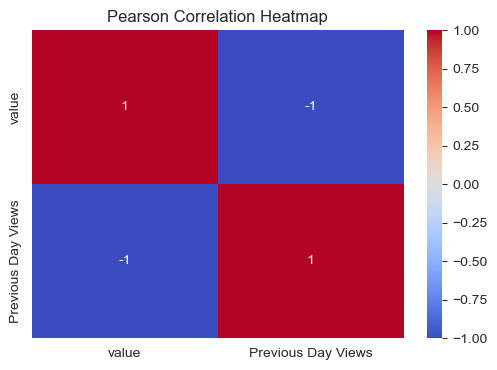

In [4]:
# Your code here:
# Calculate correlation matrices using different methods:

pearson_corr = cov_matrix.corr(method='pearson') # - Pearson: linear correlation (assumes normality)
spearman_corr = cov_matrix.corr(method='spearman') # - Spearman: rank-based correlation (monotonic relationships)
kendall_corr = cov_matrix.corr(method='kendall') # - Kendall: rank correlation (more robust with small samples or ties)

# Display the correlation matrices
print("\nPearson Correlation:")
print(pearson_corr)

print("\nSpearman Correlation:")
print(spearman_corr)

print("\nKendall Correlation:")
print(kendall_corr)

plt.figure(figsize=(6, 4))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", center=0)

# Add title
plt.title("Pearson Correlation Heatmap")

# Show plot
plt.show()

### **Question 4: Train a Simple Linear Regression Model to Predict Pageviews**
- Convert **"date"** to numeric values (days since the start).
- Train a linear regression model to predict **"value"** (pageviews) using time.**.


In [5]:
# Your code here:
# Linear Regression with Scikit-Learn
# Convert "date" to numeric values (days since the start).
df['date'] = pd.to_datetime(df['date'])
start_date = df['date'].min()
df['days_since_start'] = (df['date'] - start_date).dt.days
# Goal: Predict the actual value based on time

# Define features (independent variable) and target (dependent variable)
X = df[['days_since_start']]  # Feature: smoothed version of the value
y = df['value']           # Target: original value

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict values for the test set
y_pred = model.predict(X_test)

# Evaluate model performance
print("\nModel Evaluation:")
print("Intercept:", model.intercept_)         # The constant term (β₀)
print("Coefficient:", model.coef_[0])         # The slope (β₁) for rolling_mean




Model Evaluation:
Intercept: 9420.177493193296
Coefficient: 87.1458323829879


### **Question 5: Evaluate the Regression Model**
- Compute R-squared and Mean Squared Error (MSE).
- Discuss the model's performance.


R-squared: 0.22850595237500682
Mean Squared Error: 5013656953.8723545


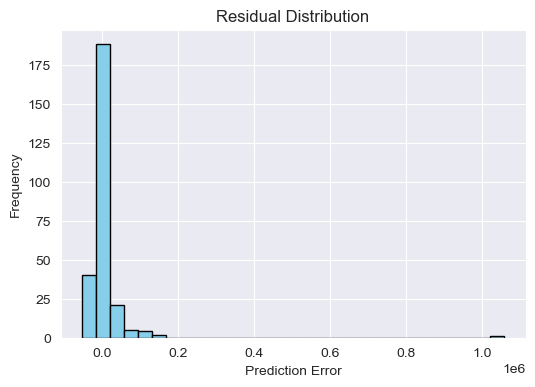

In [6]:
# Your code here:

# Calculate residuals (actual - predicted)
residuals = y_test - y_pred
print("R-squared:", r2_score(y_test, y_pred)) # Proportion of variance explained
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))  # Average squared error
# Plot histogram of residuals
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=30, edgecolor='black', color='skyblue')

# Add plot title and axis labels
plt.title("Residual Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")

# Show the plot
plt.show()

### **Question 6: Test Whether Pageviews Have Increased Over Time**
- Compare mean pageviews in the first 30 days vs. the last 30 days.
- Perform a one-sample T-test

Sample Mean: 11683.0333
✅ Result: Reject the null hypothesis — the mean is significantly different.

T-test (the first 30 days vs. the last 30 days pageviews): t-stat = 22.089305326929498, p-value = 6.370246743594599e-30


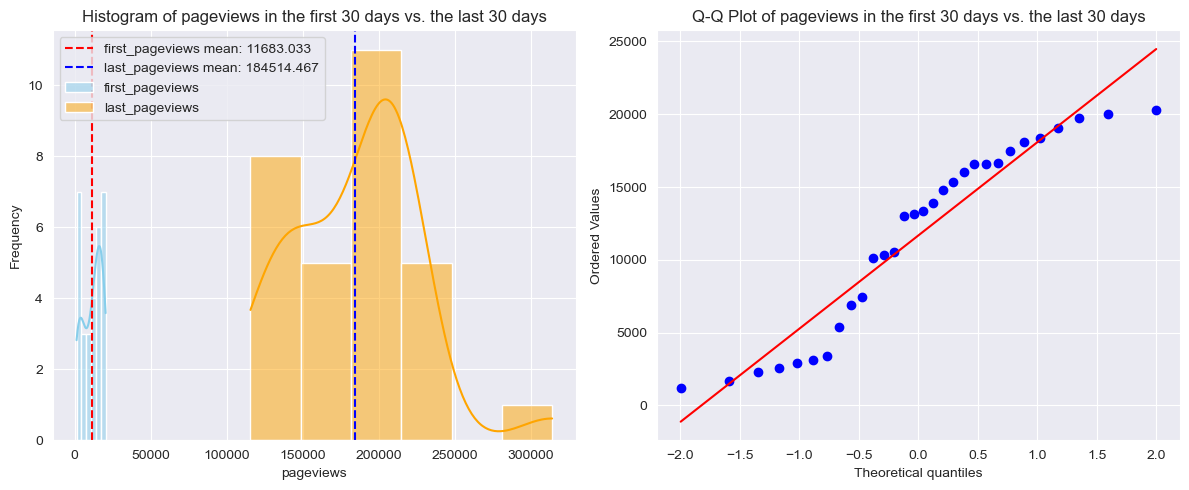

In [7]:
from scipy import stats
from scipy.stats import ttest_ind

# Your code here:
# the first 30 days pageviews
first_pageviews = df.loc[df['date'] <= df['date'].min() + pd.Timedelta(days=29), 'value']

# the last 30 days pageviews
last_pageviews = df.loc[df['date'] >= df['date'].max() - pd.Timedelta(days=29),'value']

# Calculate the sample mean
first_pageviews_mean = first_pageviews.mean()
print(f"Sample Mean: {first_pageviews_mean:.4f}")

# Define hypothesized population mean (e.g., historical benchmark or policy threshold)
hypothesized_mean = 3.0

# Perform one-sample t-test
t_stat, p_val = ttest_ind(last_pageviews, first_pageviews)


# Interpretation 
if p_val < 0.05:
    print("✅ Result: Reject the null hypothesis — the mean is significantly different.")
else:
    print("ℹ️ Result: Fail to reject the null — no significant difference from the hypothesized mean.")
    
# Display test statistic and p-value
print(f"\nT-test (the first 30 days vs. the last 30 days pageviews): t-stat = {t_stat}, p-value = {p_val}")    

plt.figure(figsize=(12, 5))

# Histogram + KDE 
plt.subplot(1, 2, 1)
sns.histplot(first_pageviews, kde=True, color='skyblue', label='first_pageviews')
sns.histplot(last_pageviews, kde=True, color='orange', label='last_pageviews')
plt.axvline(first_pageviews.mean(), color='red', linestyle='--', label=f"first_pageviews mean: {first_pageviews.mean():.3f}")
plt.axvline(last_pageviews.mean(), color='blue', linestyle='--', label=f"last_pageviews mean: {last_pageviews.mean():.3f}" )
plt.title("Histogram of pageviews in the first 30 days vs. the last 30 days")
plt.xlabel("pageviews")
plt.ylabel("Frequency")
plt.legend()

# Q-Q plot to check for normality of the sample (assumption for t-test)
plt.subplot(1, 2, 2)

stats.probplot(first_pageviews, dist="norm", plot=plt)
plt.title("Q-Q Plot of pageviews in the first 30 days vs. the last 30 days")

# Adjust layout for a clean display
plt.tight_layout()
plt.show()